# Congratulations to Completing Regression & Classification Module 🥂

## Clustering

- Clustering is similar to classification, but the basis is different. In Clustering **you don’t know what you are looking for**, and you are trying to **identify some segments or clusters** in your data.
- When you use clustering algorithms on your dataset, unexpected things can suddenly pop up like structures, clusters and groupings you would have never thought of otherwise.
- Let's start with **K-Means Clustering**

# K-Means Clustering

- K-Means Clustering is the most popular clustering algorithm out there.
- It will cluster or group the dataset by given number of cluster K.

## Algorithm

- **Step 1** : Choose the number K of cluster.
- **Step 2** : Select random K points from the graph which is our centroids. (not necessary from dataset).
- **Step 3** : Find the closest data points to the centroids & assign to them. (will form K cluster).
- **Step 4** : Place the centroid in center of the cluster.
- **Step 5** : Find the closest data points to the new centroids & reassign the label.
- **Step 6** : Repeat **Step 4 & 5** if their any reassign to the data points, else END.
- **END** : Your model is ready

## Manual Example

|||
|:---:|:---:|
|<img src="../static/k_means_ppt_1.png" alt="k_means_ppt_1.png" width="400">|<img src="../static/k_means_ppt_2.png" alt="k_means_ppt_2.png" width="400">|
|<img src="../static/k_means_ppt_3.png" alt="k_means_ppt_3.png" width="400">|<img src="../static/k_means_ppt_4.png" alt="k_means_ppt_4.png" width="400">|
|<img src="../static/k_means_ppt_5.png" alt="k_means_ppt_3.png" width="400">|<img src="../static/k_means_ppt_6.png" alt="k_means_ppt_6.png" width="400">|
|<img src="../static/k_means_ppt_7.png" alt="k_means_ppt_7.png" width="400">|<img src="../static/k_means_ppt_8.png" alt="k_means_ppt_8.png" width="400">|
|<img src="../static/k_means_ppt_9.png" alt="k_means_ppt_9.png" width="400">|<img src="../static/k_means_ppt_10.png" alt="k_means_ppt_10.png" width="400">|
|<img src="../static/k_means_ppt_11.png" alt="k_means_ppt_11.png" width="400">|<img src="../static/k_means_ppt_12.png" alt="k_means_ppt_12.png" width="400">|
|<img src="../static/k_means_ppt_13.png" alt="k_means_ppt_13.png" width="400">|<img src="../static/k_means_ppt_14.png" alt="k_means_ppt_14.png" width="400">|
|||

## Random Initialization Trap

- In our **``Step 2 : Select random K points from the graph which is our centroids. (not necessary from dataset).``**
- We need to be very careful while choosing the random K points.
- I will show you 2 cases where we are trying to place the random point, that change our clusters.

#### Case 1:
- We have selected the random K points for the given dataset in the correct places.

<img src="../static/k_means_random_initialization_trap_1.png" alt="k_means_random_initialization_trap_1.png" width="400">

#### Case 2:
- If we select random K points in different place which is not relevant to the dataset then entire model will be changes.

<img src="../static/k_means_random_initialization_trap_2.png" alt="k_means_random_initialization_trap_2.png" width="400">

#### Solution (K-Means++):
- There is no specific solution for choosing the random points, but we have **K-Means++** to avoid these kinds of issues.


## Selecting The Number Of Clusters

- From our **``Step 1 : Choose the number K of cluster.``**
- We know that, we manually need to choose the number of K cluster count.
- We can choose 1(min) to n(max) as the K value. *(where n=total number of dataset)*
- I have a doubt that how we can choose this K value which given K proper split of our dataset? *(Hope you also have same doubt)*
- Answer is, we can use **Elbow-Method using WCSS** value.

### WCSS
- Let's assume we take K=3 for now, then we can find the WCSS value from given equation.

    <img src="../static/k_means_wcss_eqn_1.png" alt="k_means_wcss_eqn_1.png">
- As we can see, we have 3 Summations for 3 clusters.

    <img src="../static/k_means_wcss_eqn_2.png" alt="k_means_wcss_eqn_2.png">
    
> Where, we found summation (Σ) of square (x<sup>2</sup>) of distance between every point in the cluster (P<sub>i</sub>) & centroid (C<sub>K</sub>).
- Similarly, we need to find WCSS for every K values.  

### Elbow-Method
- Lets plot the graph between K value & WCSS value.

<img src="../static/k_means_elbow_method.png" alt="k_means_elbow_method.png">

- If you see the chart, we can understand for K values 1, 2, 3, 4 there is a huge loss in WCSS value.
- But for 5, 6, 7, 8, 9, 10 values there is not much loss in WCSS value.
- So, we can fix with 4 as the K value. (i.e., K=4)

## Lots of theory: Let's start the practical.

## Data preprocessing

✔️ Import the necessary libraries.

✔️ Load dataset (Mall_Customers_1.csv).

❌ Our dataset doesn't have any missing data.

❌ Our dataset doesn't have any string data.

❌ As we don't have dependent variable & we are going to find new dependent variable from the dataset by clustering. We are not performing test & train data splitting.

❌ As our dataset having range value, we are not performing feature scaling.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
dataset = pd.read_csv(r"../dataset/Mall_Customers_1.csv")
X = dataset.iloc[:, [1, 2]].values # [row, column]

## Find K using Elbow-Method

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


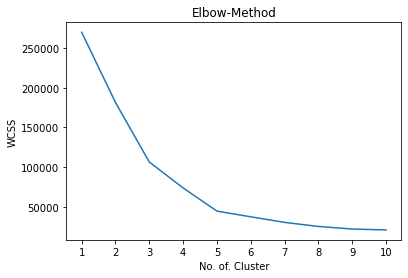

In [3]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # kmeans.inertia_ -> wcss value for the K=i
plt.plot(range(1, 10+1), wcss)
plt.title("Elbow-Method")
plt.xlabel("No. of. Cluster")
plt.ylabel("WCSS")
plt.xticks(range(1, 10+1))
plt.show()

In [4]:
# from graph we can understand after point 5 slope of the line is low.
# So,
K=5

## Train K-Means Clustering Model

In [5]:
kmeans = KMeans(n_clusters=K, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


## Check and visualize cluster
- Hence, we take 2 features from Mall_Customers_1.csv. We can plot 2d graph between them.

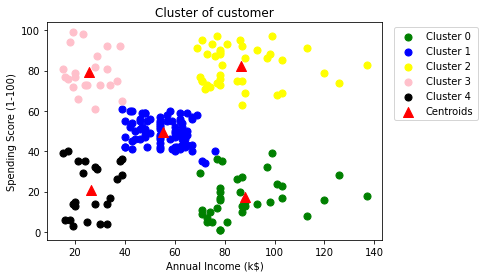

In [6]:
colors = ["green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"]
for i in range(K):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 50, c = colors[i], label = f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', s = 100, c = 'red', label = 'Centroids')
plt.title("Cluster of customer")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

## Let's do the same for multiple feature dataset/

## Data preprocessing

✔️ Import the necessary libraries.

✔️ Load dataset (Mall_Customers_2.csv).

❌ Our dataset doesn't have any missing data.

✔️ Our dataset have string value "Genre" → ["Male", "Female"], need to label them.

❌ As we don't have dependent variable & we are going to find new dependent variable from the dataset by clustering. We are not performing test & train data splitting.

❌ As our dataset having range value, we are not performing feature scaling.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


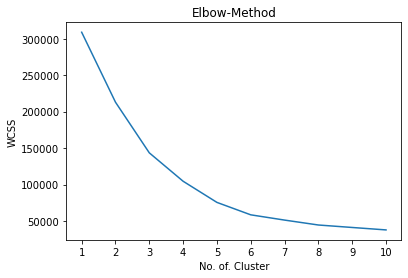

In [7]:
dataset = pd.read_csv(r"../dataset/Mall_Customers_2.csv")
X = dataset.iloc[:, [1, 2, 3, 4]].values # [row, column]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],remainder='passthrough')
X = ct.fit_transform(X)

## Find K using Elbow-Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # kmeans.inertia_ -> wcss value for the K=i
plt.plot(range(1, 10+1), wcss)
plt.title("Elbow-Method")
plt.xlabel("No. of. Cluster")
plt.ylabel("WCSS")
plt.xticks(range(1, 10+1))
plt.show()

In [8]:
# from graph we can understand after point 5 slope of the line is low.
# So,
K=3

## Train K-Means Clustering Model
kmeans = KMeans(n_clusters=K, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)
print(kmeans.cluster_centers_)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
[[ 0.47368421  0.52631579 40.39473684 87.         18.63157895]
 [ 0.53846154  0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.59349593  0.40650407 40.32520325 44.15447154 49.82926829]]


## Check and visualize cluster
- Hence, we have more than 2 features. We can't plot 2d graph to visualize the cluster
- But, we can see that our dataset is generated `y_kmeans` with 3 clusters.  